In [1]:
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_10893/2932342832.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.97])


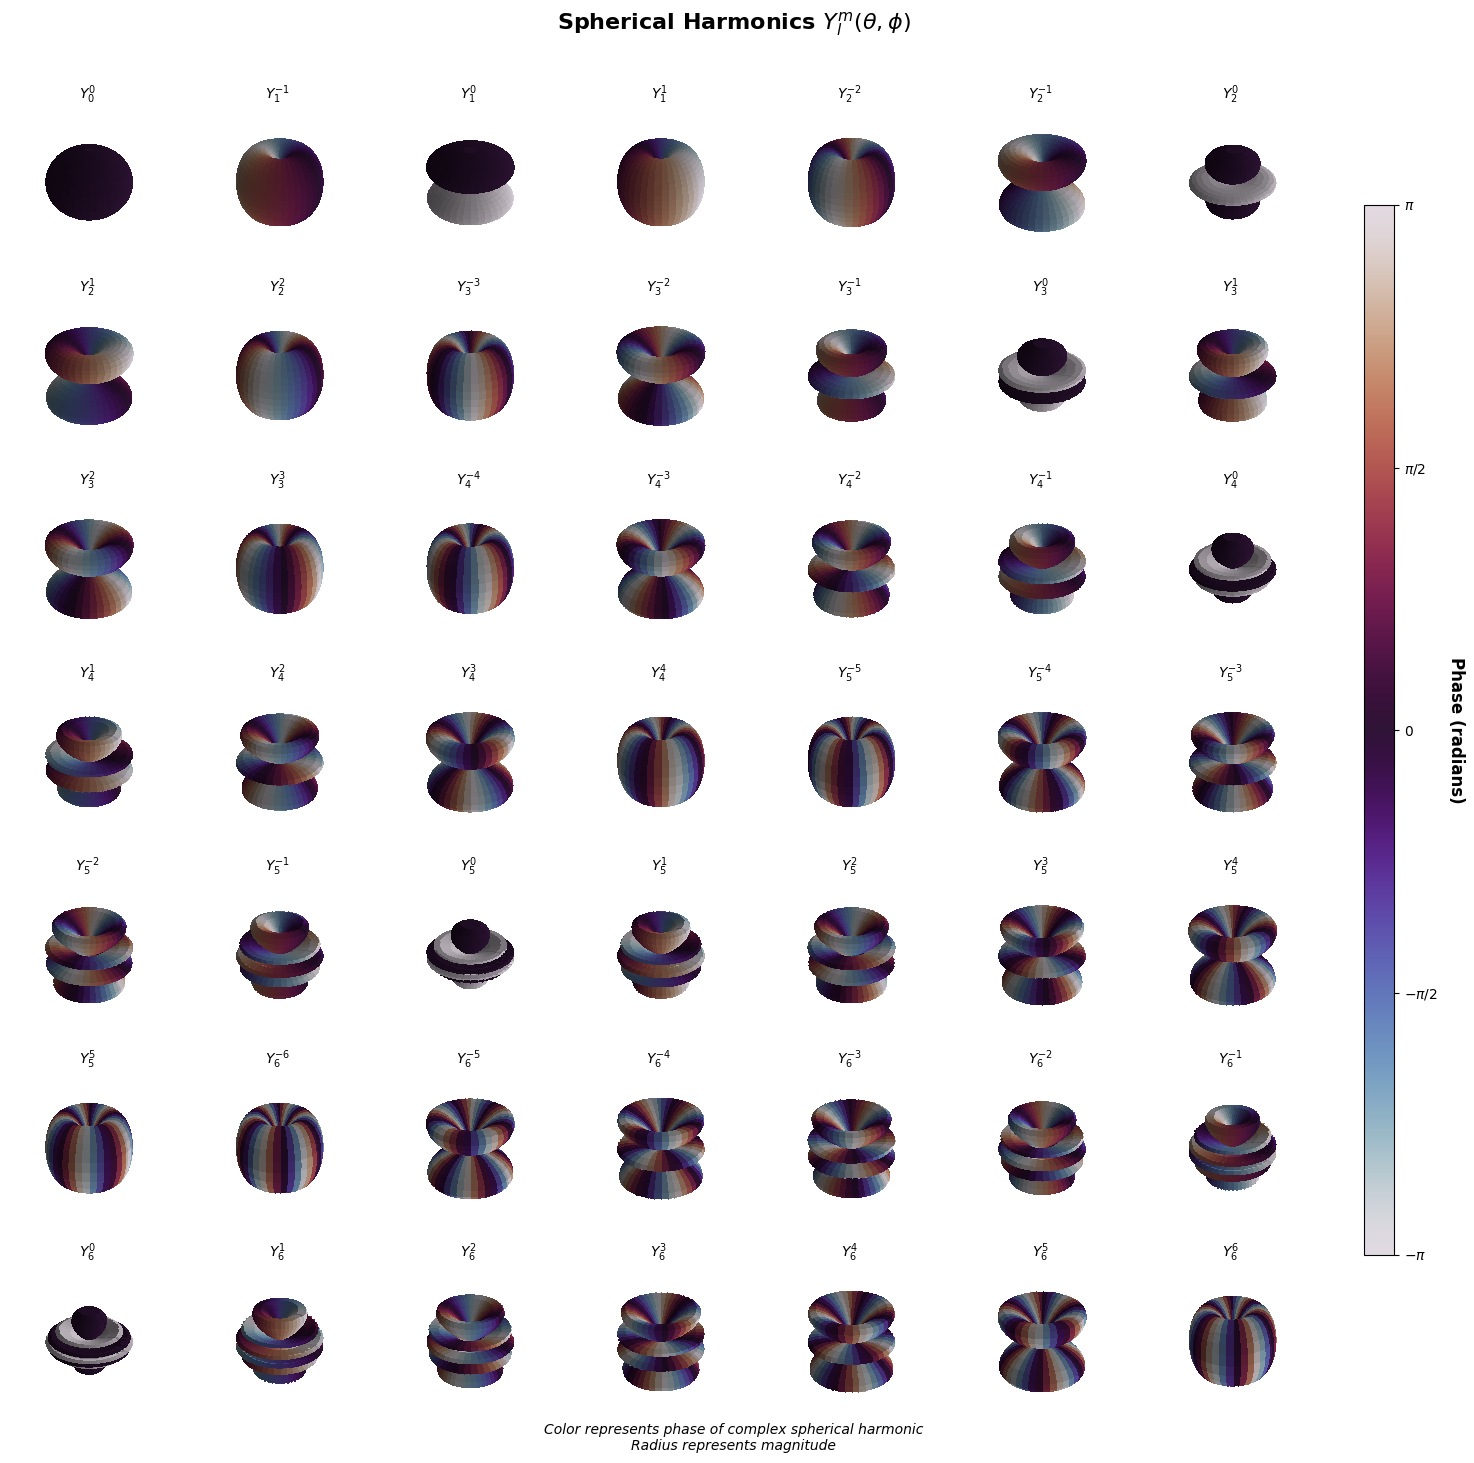

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# -----------------------------------------
# Helper function to plot one spherical harmonic
# -----------------------------------------
def plot_spherical_harmonic(ax, l, m, resolution=100):
    # Angles
    theta = np.linspace(0, np.pi, resolution)
    phi = np.linspace(0, 2 * np.pi, resolution)
    phi_grid, theta_grid = np.meshgrid(phi, theta)

    # Compute spherical harmonic
    Y = sph_harm(m, l, phi_grid, theta_grid)

    # Radius = magnitude
    r = np.abs(Y)

    # Convert spherical → Cartesian for plotting
    x = r * np.sin(theta_grid) * np.cos(phi_grid)
    y = r * np.sin(theta_grid) * np.sin(phi_grid)
    z = r * np.cos(theta_grid)

    # Calculate phase for coloring
    phase = np.angle(Y)
    
    # Plot surface
    surf = ax.plot_surface(
        x, y, z,
        facecolors=plt.cm.twilight((phase / (2*np.pi)) + 0.5),
        rstride=2, cstride=2,
        linewidth=0, antialiased=False
    )

    ax.set_title(f"$Y_{{{l}}}^{{{m}}}$", fontsize=10)
    ax.set_axis_off()
    
    return phase

# -----------------------------------------
# Plot spherical harmonics
# -----------------------------------------

# (l, m) values to display
harmonics = [
    (0, 0), 
    (1, -1), (1, 0), (1, 1), 
    (2, -2), (2, -1), (2, 0), (2, 1), (2, 2), 
    (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3), 
    (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), 
    (5, -5), (5, -4), (5, -3), (5, -2), (5, -1), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), 
    (6, -6), (6, -5), (6, -4), (6, -3), (6, -2), (6, -1), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)
]

# Calculate grid size for 49 harmonics
num_harmonics = len(harmonics)
cols = 7  # 7 columns
rows = int(np.ceil(num_harmonics / cols))  # 7 rows

fig = plt.figure(figsize=(15, 15), dpi=100)

# Add main title
fig.suptitle('Spherical Harmonics $Y_l^m(\\theta, \\phi)$', 
             fontsize=16, fontweight='bold', y=0.98)

# Plot each harmonic
for i, (l, m) in enumerate(harmonics, 1):
    ax = fig.add_subplot(rows, cols, i, projection='3d')
    plot_spherical_harmonic(ax, l, m, resolution=80)

# Add colorbar for phase
# Create a separate axes for the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]

# Create colorbar
norm = Normalize(vmin=-np.pi, vmax=np.pi)
sm = cm.ScalarMappable(cmap=plt.cm.twilight, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Phase (radians)', rotation=270, labelpad=20, fontsize=12, fontweight='bold')
cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels(['$-\\pi$', '$-\\pi/2$', '$0$', '$\\pi/2$', '$\\pi$'])

# Add text explanation
fig.text(0.5, 0.02, 
         'Color represents phase of complex spherical harmonic\nRadius represents magnitude',
         ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 0.9, 0.97])
plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/coolplots/spherical_harmonics.png", dpi=300)
plt.show()

In [4]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # ← ADD THIS LINE
from scipy.special import sph_harm

# ------------------------------------------------------------
# Generate spherical harmonic surface in Cartesian coordinates
# ------------------------------------------------------------
def spherical_harmonic_surface(l, m, resolution=200):
    theta = np.linspace(0, np.pi, resolution)
    phi = np.linspace(0, 2*np.pi, resolution)
    phi_grid, theta_grid = np.meshgrid(phi, theta)

    # Complex spherical harmonic
    Y = sph_harm(m, l, phi_grid, theta_grid)

    # Radius = magnitude
    r = np.abs(Y)

    # Convert to Cartesian coords
    x = r * np.sin(theta_grid) * np.cos(phi_grid)
    y = r * np.sin(theta_grid) * np.sin(phi_grid)
    z = r * np.cos(theta_grid)

    # Phase color
    colors = np.angle(Y)

    return x, y, z, colors

# ------------------------------------------------------------
# Create interactive figure
# ------------------------------------------------------------
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}]],
    subplot_titles=["Y₀⁰", "Y₁⁻¹", "Y₁⁰", "Y₁¹"],
    horizontal_spacing=0.05,
    vertical_spacing=0.05
)

harmonics = [(0, 0), (1, -1), (1, 0), (1, 1)]

for i, ((l, m), (row, col)) in enumerate(zip(harmonics, [(1,1), (1,2), (2,1), (2,2)])):
    x, y, z, colors = spherical_harmonic_surface(l, m, resolution=100)

    fig.add_trace(
        go.Surface(
            x=x, y=y, z=z,
            surfacecolor=colors,
            colorscale="Twilight",
            showscale=(i == 0),  # Show colorbar only for first plot
            colorbar=dict(
                title="Phase (rad)",
                x=1.15,
                len=0.4,
                y=0.75
            ) if i == 0 else None,
            opacity=1,
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title_text="Interactive Spherical Harmonics (Magnitude Shape, Phase Colour)",
    title_font_size=16,
    width=1000,
    height=1000,
    showlegend=False
)

# Update scene properties for each subplot
for i in range(1, 5):
    scene_name = f'scene{i}' if i > 1 else 'scene'
    fig.update_layout({
        scene_name: dict(
            aspectmode='data',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        )
    })

fig.show()